In [ ]:
# TUGAS PRAKTIKUM
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

print(df.head())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
# 2. Pilih fitur untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


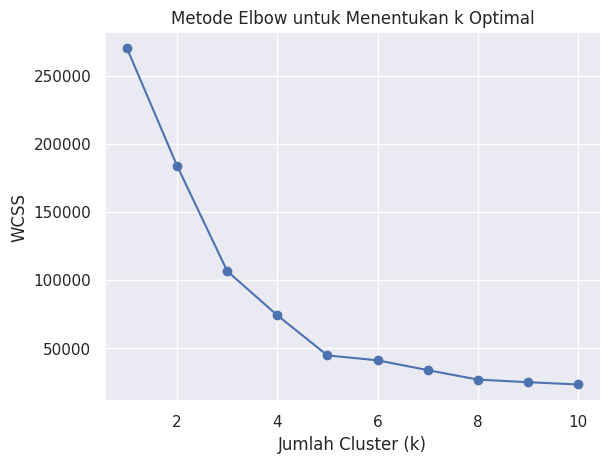

In [ ]:
# Tentukan jumlah cluster (k) terbaik → Metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()


In [ ]:
# 4. Buat model K-Means dengan k optimal
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

df['Cluster'] = y_kmeans
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


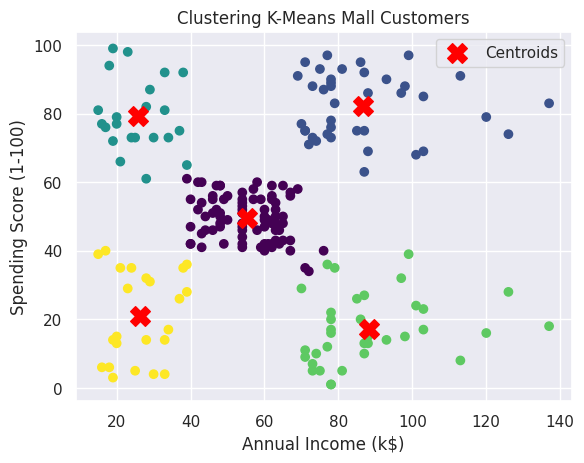

In [ ]:
# 5. Visualisasi hasil clustering
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering K-Means Mall Customers')
plt.legend()
plt.show()


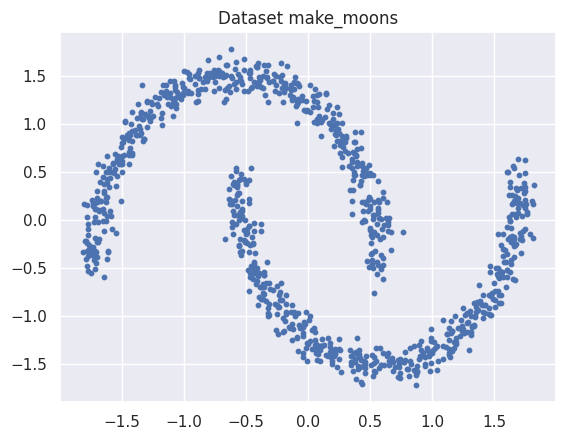

In [ ]:
# Tugas DBSCAN

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=0)

# Normalisasi
X = StandardScaler().fit_transform(X)

# Visualisasi data awal
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Dataset make_moons")
plt.show()


In [ ]:
# 2. DBSCAN dengan parameter dasar (eps=0.2, min_samples=5)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Hitung jumlah klaster & noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Jumlah klaster: ", n_clusters_)
print("Jumlah noise: ", n_noise_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


Jumlah klaster:  2
Jumlah noise:  0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392


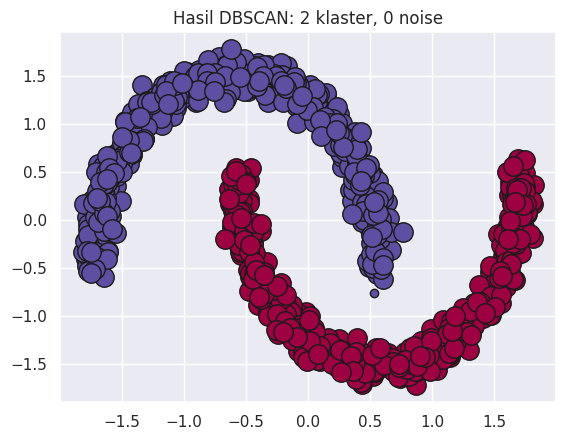

In [ ]:
# 3. Visualisasi hasil DBSCAN
# Mask core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
unique_labels = set(labels)

# Warna tiap klaster
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise = hitam
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Hasil DBSCAN: {n_clusters_} klaster, {n_noise_} noise")
plt.show()


In [ ]:
# 4. Eksperimen dengan variasi eps dan min_samples
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 5, 10, 20]

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        print(f"\n=== eps={eps}, min_samples={ms} ===")
        print("Jumlah klaster:", n_clusters_)
        print("Jumlah noise:", n_noise_)
        print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
        print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
        print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
        if n_clusters_ > 1:  # Silhouette butuh >= 2 klaster
            print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
        else:
            print("Silhouette Coefficient: Tidak terdefinisi (hanya 1 klaster)")



=== eps=0.05, min_samples=3 ===
Jumlah klaster: 67
Jumlah noise: 197
Homogeneity: 0.804
Completeness: 0.155
V-measure: 0.260
Adjusted Rand Index: 0.033
Adjusted Mutual Information: 0.246
Silhouette Coefficient: 0.078

=== eps=0.05, min_samples=5 ===
Jumlah klaster: 51
Jumlah noise: 444
Homogeneity: 0.556
Completeness: 0.137
V-measure: 0.220
Adjusted Rand Index: 0.014
Adjusted Mutual Information: 0.208
Silhouette Coefficient: -0.102

=== eps=0.05, min_samples=10 ===
Jumlah klaster: 0
Jumlah noise: 1000
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Silhouette Coefficient: Tidak terdefinisi (hanya 1 klaster)

=== eps=0.05, min_samples=20 ===
Jumlah klaster: 0
Jumlah noise: 1000
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Silhouette Coefficient: Tidak terdefinisi (hanya 1 klaster)

=== eps=0.1, min_samples=3 ===
Jumlah klaster: 3
Jumlah noise: 1

eps kecil → lebih ketat, biasanya banyak noise & klaster bisa pecah jadi kecil-kecil.

eps besar → lebih longgar, noise berkurang, tapi bisa jadi semua titik dianggap 1 klaster.

min_samples kecil → lebih mudah membentuk klaster (bahkan dari titik sedikit).

min_samples besar → makin sulit membentuk klaster, noise lebih banya

In [ ]:
# DBSCAN Eksperimen make_moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=0)
X = StandardScaler().fit_transform(X)

# Daftar parameter
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

#
results = []

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X)
        labels = db.labels_

        # Jumlah cluster (abaikan noise = -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Evaluasi (cluster >= 2 valid)
        if n_clusters > 1:
            hom = metrics.homogeneity_score(labels_true, labels)
            com = metrics.completeness_score(labels_true, labels)
            v_measure = metrics.v_measure_score(labels_true, labels)
            ari = metrics.adjusted_rand_score(labels_true, labels)
            ami = metrics.adjusted_mutual_info_score(labels_true, labels)
            sil = metrics.silhouette_score(X, labels)
        else:
            hom = com = v_measure = ari = ami = sil = np.nan

        results.append([eps, ms, n_clusters, n_noise, hom, com, v_measure, ari, ami, sil])

df_results = pd.DataFrame(results, columns=[
    "eps", "min_samples", "Clusters", "Noise",
    "Homogeneity", "Completeness", "V-measure",
    "ARI", "AMI", "Silhouette"
])

print(df_results)


     eps  min_samples  Clusters  Noise  Homogeneity  Completeness  V-measure  \
0   0.05            3        67    197     0.803825      0.154915   0.259767   
1   0.05           10         0   1000          NaN           NaN        NaN   
2   0.05           20         0   1000          NaN           NaN        NaN   
3   0.10            3         3     18     0.983471      0.708395   0.823571   
4   0.10           10         9     63     0.938949      0.358282   0.518656   
5   0.10           20         6    844     0.157108      0.153385   0.155224   
6   0.30            3         2      0     1.000000      1.000000   1.000000   
7   0.30           10         2      0     1.000000      1.000000   1.000000   
8   0.30           20         2      0     1.000000      1.000000   1.000000   
9   0.50            3         1      0          NaN           NaN        NaN   
10  0.50           10         1      0          NaN           NaN        NaN   
11  0.50           20         2      0  